<a href="https://colab.research.google.com/github/archihalder/EmoDet/blob/main/EmoDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset from Kaggle

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"archihalder","key":"9ed327f3ff9b5e4189d61df3aca57690"}'}

In [3]:
!mkdir ~/.kaggle 

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d msambare/fer2013

 73% 44.0M/60.3M [00:00<00:00, 129MB/s]
100% 60.3M/60.3M [00:00<00:00, 152MB/s]


In [7]:
!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

# Importing Libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Image

In [9]:
picture_size = 48
folder_path = "/content/"

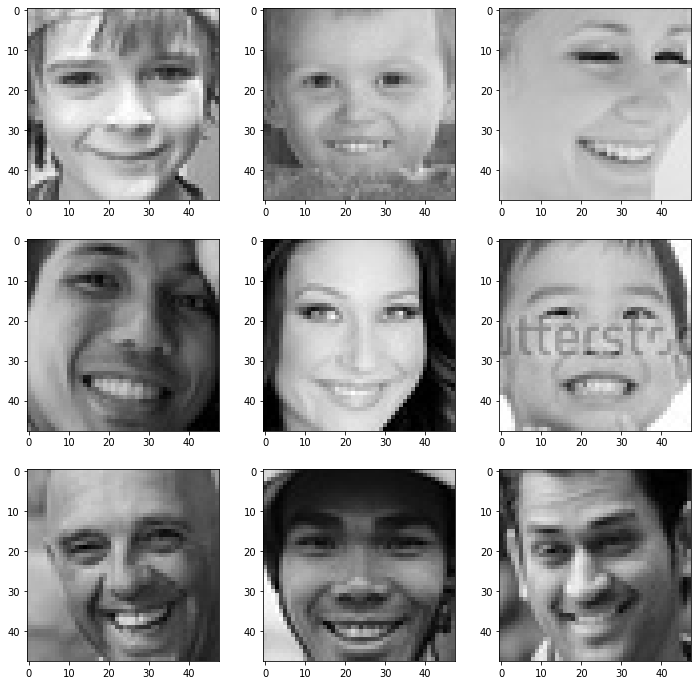

In [11]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Testing Set

In [12]:
train_dir = folder_path + '/train'
labels = os.listdir(train_dir)
labels

['angry', 'neutral', 'sad', 'fear', 'happy', 'surprise', 'disgust']

### Train Set

In [13]:
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split = 0.2)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

val_set = datagen_train.flow_from_directory(folder_path + 'train',
                                            batch_size=batch_size,
                                            target_size=(48,48),
                                            class_mode='categorical',
                                            color_mode='grayscale',
                                            subset = 'validation')

Found 28709 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


### Test Set

In [15]:
datagen_test = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip = True,
                                  vertical_flip = True)

test_set = datagen_test.flow_from_directory(folder_path+"test",
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 7178 images belonging to 7 classes.


# Model 1

In [16]:
from tensorflow.keras import models, layers, regularizers

In [17]:
input_shape = (48,48,1)
num_classes = 7

In [30]:
model = Sequential()

# 1st CNN Layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape)) 
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 2nd CNN Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 3rd CNN Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

#Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [19]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

### Training the model

In [20]:
num_epochs = 40
STEP_SIZE_TRAIN = train_set.n//train_set.batch_size
STEP_SIZE_TEST = val_set.n//val_set.batch_size

In [21]:
history = model.fit(train_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=num_epochs, verbose=1, 
                    validation_data=val_set, validation_steps=STEP_SIZE_TEST)

Epoch 1/40
224/224 [==============================] - 48s 76ms/step - loss: 1.8032 - accuracy: 0.2508 - val_loss: 1.7750 - val_accuracy: 0.2585
Epoch 2/40
224/224 [==============================] - 17s 75ms/step - loss: 1.6958 - accuracy: 0.3119 - val_loss: 1.6145 - val_accuracy: 0.3583
Epoch 3/40
224/224 [==============================] - 17s 75ms/step - loss: 1.5257 - accuracy: 0.4021 - val_loss: 1.4544 - val_accuracy: 0.4226
Epoch 4/40
224/224 [==============================] - 16s 73ms/step - loss: 1.3788 - accuracy: 0.4676 - val_loss: 1.3153 - val_accuracy: 0.4877
Epoch 5/40
224/224 [==============================] - 17s 74ms/step - loss: 1.2768 - accuracy: 0.5102 - val_loss: 1.2424 - val_accuracy: 0.5243
Epoch 6/40
224/224 [==============================] - 16s 73ms/step - loss: 1.2107 - accuracy: 0.5378 - val_loss: 1.1575 - val_accuracy: 0.5611
Epoch 7/40
224/224 [==============================] - 16s 73ms/step - loss: 1.1583 - accuracy: 0.5603 - val_loss: 1.1165 - val_accuracy:

### Plotting accuracy curve

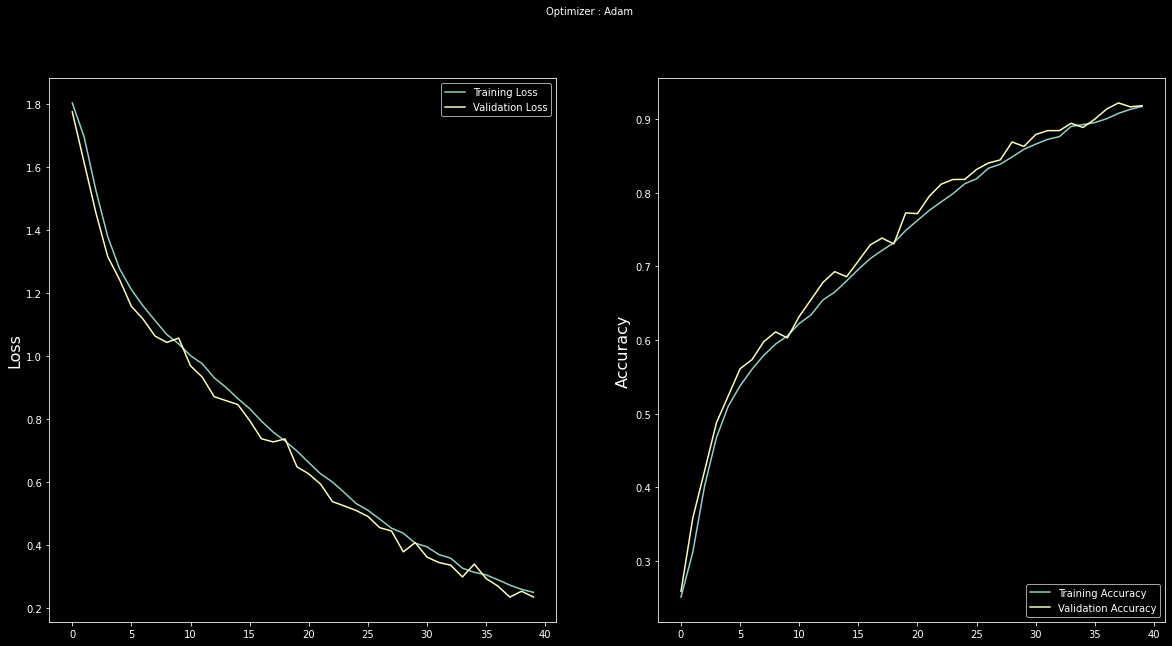

In [22]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Model 2

In [31]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model1 = Sequential()

#1st CNN layer
model1.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

#2nd CNN layer
model1.add(Conv2D(128,(5,5),padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout (0.25))

#3rd CNN layer
model1.add(Conv2D(256,(3,3),padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout (0.25))

#4th CNN layer
# model1.add(Conv2D(512,(3,3), padding='same'))
# model1.add(BatchNormalization())
# model1.add(Activation('relu'))
# model1.add(MaxPooling2D(pool_size=(2, 2)))
# model1.add(Dropout(0.25))

model1.add(Flatten())

#Fully connected 1st layer
# model1.add(Dense(256))
# model1.add(BatchNormalization())
# model1.add(Activation('relu'))
# model1.add(Dropout(0.25))


# Fully connected layer 2nd layer
model1.add(Dense(64))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate = 0.0001)
model1.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting model with training and validation data

In [24]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

# early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model1.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [25]:
history1 = model1.fit(train_set, 
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs, verbose=1, 
                    validation_data = val_set, 
                    validation_steps=test_set.n//val_set.batch_size,
                    # callbacks=callbacks_list
                    )

Epoch 1/50
224/224 [==============================] - 19s 79ms/step - loss: 2.2097 - accuracy: 0.1866 - val_loss: 2.0247 - val_accuracy: 0.1683
Epoch 2/50
224/224 [==============================] - 15s 65ms/step - loss: 1.9241 - accuracy: 0.2578
Epoch 3/50
224/224 [==============================] - 15s 65ms/step - loss: 1.8131 - accuracy: 0.2943
Epoch 4/50
224/224 [==============================] - 15s 65ms/step - loss: 1.7457 - accuracy: 0.3224
Epoch 5/50
224/224 [==============================] - 15s 65ms/step - loss: 1.6891 - accuracy: 0.3454
Epoch 6/50
224/224 [==============================] - 15s 65ms/step - loss: 1.6399 - accuracy: 0.3669
Epoch 7/50
224/224 [==============================] - 15s 65ms/step - loss: 1.6012 - accuracy: 0.3835
Epoch 8/50
224/224 [==============================] - 15s 65ms/step - loss: 1.5696 - accuracy: 0.3949
Epoch 9/50
224/224 [==============================] - 15s 65ms/step - loss: 1.5346 - accuracy: 0.4090
Epoch 10/50
224/224 [===================

### Plotting accuracy and loss curve

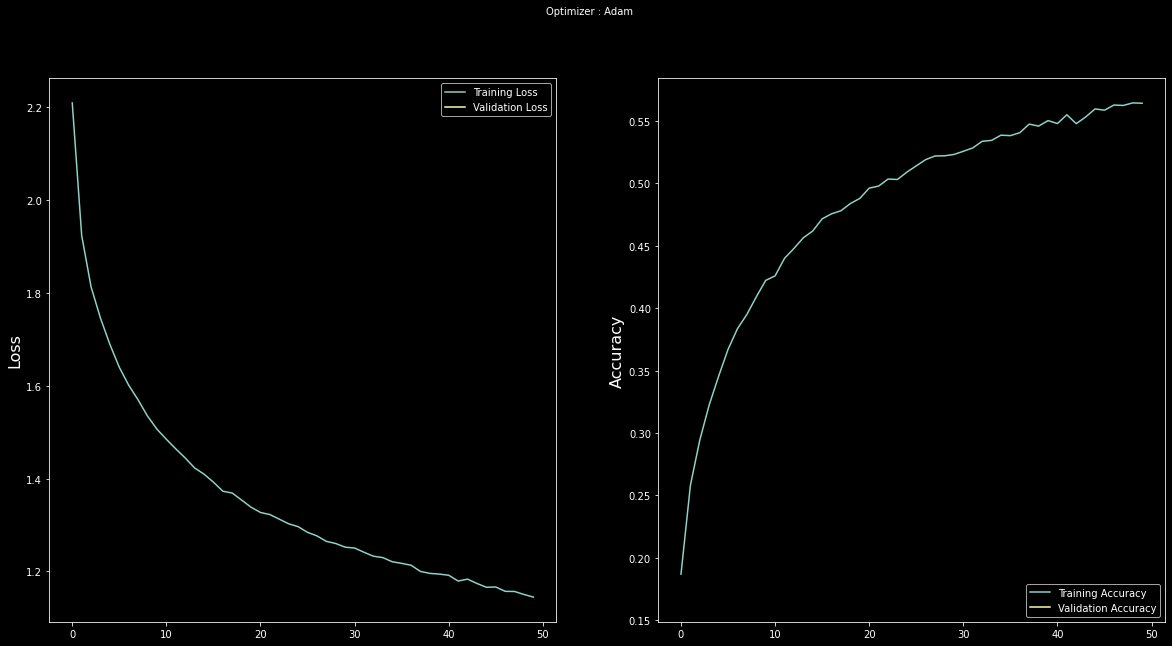

In [27]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Summary of the models

### Model 1 summary

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

### Model 2 summary

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

# Saving the models

In [29]:
model_dir = '/content/model.h5'
model1_dir = '/content/model1.h5'
model.save(model_dir)
model1.save(model1_dir)

# Thank You